# EasyEdit Example with **ROME** on **GPT-NEO**
作者: 刘美林，张高榕


### 一、小组分工

模型与编辑方式的选择：刘美林，张高榕

配置环境和参数的选择：刘美林，张高榕

Reliability Test：刘美林，张高榕

Generalization test：张高榕，刘美林

Locality test：张高榕，刘美林

报告的书写：张高榕，刘美林

### 二、编辑方法介绍

Method: ROME

Paper:[Locating and Editing Factual Associations in GPT](https://arxiv.org/abs/2202.05262)
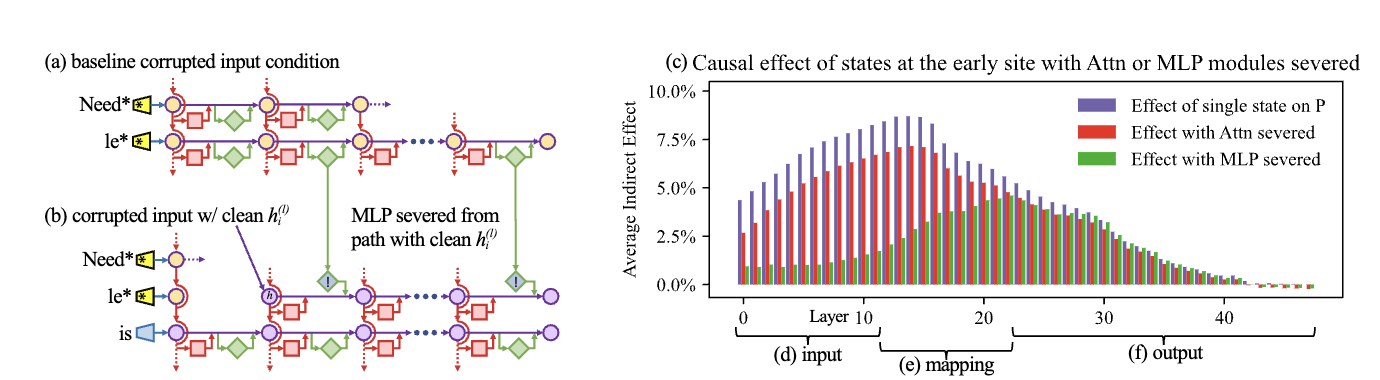

### 三、实验过程

## Prepare the runtime environment

In [ ]:
# !git clone https://github.com/zjunlp/EasyEdit
%cd EasyEdit
!ls

In [ ]:
!apt-get install python3.9
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 1
!sudo update-alternatives --config python3
!apt-get install python3-pip
%pip install -r requirements.txt

## Config Method Parameters



```python
# For ROME hparams:

alg_name: "ROME"
model_name: "./hugging_cache/gptneo-1_3b"
stats_dir: "./data/stats"
device: auto
layers: [5]
fact_token: "subject_last"
v_num_grad_steps: 20
v_lr: 5e-1
v_loss_layer: 20
v_weight_decay: 0.5
clamp_norm_factor: 4
kl_factor: 0.0625
mom2_adjustment: false
context_template_length_params: [[5, 10], [10, 10]]
rewrite_module_tmp: "transformer.h.{}.mlp.c_proj"
layer_module_tmp: "transformer.h.{}"
mlp_module_tmp: "transformer.h.{}.mlp"
attn_module_tmp: "transformer.h.{}.attn"
ln_f_module: "transformer.ln_f"
lm_head_module: "transformer.wte"
mom2_dataset: "wikipedia"
mom2_n_samples: 100000
mom2_dtype: "float32"
model_parallel: true
```



## Import modules & Run

### Edit llama-7b

In [2]:
from easyeditor import BaseEditor
from easyeditor import ROMEHyperParams
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [7]:
hparams = ROMEHyperParams.from_hparams('./hparams/ROME/gptneo-1_3b.yaml')
prompts = ['Who was the designer of Lahti Town Hall?',
                'What role does Denny Herzig play in football?',
                'What city did Marl Young live when he died?']
ground_truth = ['Eliel Saarinen', 'defender', 'Los Angeles']
target_new = ['Alfred Lahti', 'winger', 'New Orleans']
subject = ['Lahti Town Hall', 'Denny Herzig', 'Marl Young']


In [ ]:
editor = BaseEditor.from_hparams(hparams)
metrics, edited_model, _ = editor.edit(
    prompts=prompts,
    ground_truth=ground_truth,
    target_new=target_new,
    subject=subject,
    sequential_edit=True
)
print(metrics)
print(type(edited_model))

2023-11-18 19:15:20,106 - easyeditor.editors.editor - INFO - Instantiating model
2023-11-18 19:15:20,106 - easyeditor.editors.editor - INFO - Instantiating model
11/18/2023 19:15:20 - INFO - easyeditor.editors.editor -   Instantiating model


Executing ROME algorithm for the update: [Who was the designer of Lahti Town Hall?] -> [ Alfred Lahti]
Computing left vector (u)...
Selected u projection object Lahti Town Hall
Left vector shape: torch.Size([8192])
Computing right vector (v)
Lookup index found: 8 | Sentence: Who was the designer of Lahti Town Hall? Alfred Lah | Token:  Hall
Rewrite layer is 5
Tying optimization objective to 20
Recording initial value of v*
loss 4.832 = 4.832 + 0.0 + 0.0 avg prob of [ Alfred Lahti] 0.00828216690570116
loss 4.258 = 4.249 + 0.002 + 0.007 avg prob of [ Alfred Lahti] 0.014979138970375061
loss 3.684 = 3.669 + 0.004 + 0.011 avg prob of [ Alfred Lahti] 0.027203168720006943
loss 3.075 = 3.051 + 0.009 + 0.015 avg prob of [ Alfred Lahti] 0.05068495124578476
loss 2.38 = 2.341 + 0.021 + 0.018 avg prob of [ Alfred Lahti] 0.10270415991544724
loss 1.848 = 1.804 + 0.023 + 0.021 avg prob of [ Alfred Lahti] 0.1741219311952591
loss 1.362 = 1.311 + 0.027 + 0.024 avg prob of [ Alfred Lahti] 0.28045707941055

2023-11-18 19:15:26,797 - easyeditor.editors.editor - INFO - Execution 0 editing took 3.442507743835449
2023-11-18 19:15:26,797 - easyeditor.editors.editor - INFO - Execution 0 editing took 3.442507743835449
11/18/2023 19:15:26 - INFO - easyeditor.editors.editor -   Execution 0 editing took 3.442507743835449
2023-11-18 19:15:26,817 - easyeditor.editors.editor - INFO - Evaluation took 0.019409656524658203
2023-11-18 19:15:26,817 - easyeditor.editors.editor - INFO - Evaluation took 0.019409656524658203
11/18/2023 19:15:26 - INFO - easyeditor.editors.editor -   Evaluation took 0.019409656524658203


loss 0.067 = 0.007 + 0.013 + 0.047 avg prob of [ Alfred Lahti] 0.9932361841201782
Delta norm: 157.568115234375
Change in target norm: 40.75736618041992 to 162.83470153808594 => 122.07733154296875
Division Factor: 14.743935585021973
Right vector norm: 10.686978340148926
Right vector shape: torch.Size([2048])
Deltas successfully computed for ['transformer.h.5.mlp.c_proj.weight']
New weights successfully inserted into ['transformer.h.5.mlp.c_proj.weight']
Executing ROME algorithm for the update: [What role does Denny Herzig play in football?] -> [ winger]
Computing left vector (u)...
Selected u projection object Denny Herzig
Left vector shape: torch.Size([8192])
Computing right vector (v)
Lookup index found: 6 | Sentence: What role does Denny Herzig play in football? | Token: ig
Rewrite layer is 5
Tying optimization objective to 20
Recording initial value of v*
loss 14.356 = 14.356 + 0.0 + 0.0 avg prob of [ winger] 9.445556656828558e-07
loss 14.081 = 14.063 + 0.012 + 0.007 avg prob of [ w

2023-11-18 19:15:30,222 - easyeditor.editors.editor - INFO - Execution 1 editing took 3.4043798446655273
2023-11-18 19:15:30,222 - easyeditor.editors.editor - INFO - Execution 1 editing took 3.4043798446655273
11/18/2023 19:15:30 - INFO - easyeditor.editors.editor -   Execution 1 editing took 3.4043798446655273


loss 0.087 = 0.027 + 0.024 + 0.036 avg prob of [ winger] 0.9748565554618835
loss 0.075 = 0.014 + 0.024 + 0.036 avg prob of [ winger] 0.9860383868217468
Delta norm: 126.45757293701172
Change in target norm: 41.70188522338867 to 133.3090057373047 => 91.60711669921875
Division Factor: 14.52014446258545
Right vector norm: 8.709113121032715
Right vector shape: torch.Size([2048])
Deltas successfully computed for ['transformer.h.5.mlp.c_proj.weight']
New weights successfully inserted into ['transformer.h.5.mlp.c_proj.weight']


2023-11-18 19:15:30,243 - easyeditor.editors.editor - INFO - Evaluation took 0.01987433433532715
2023-11-18 19:15:30,243 - easyeditor.editors.editor - INFO - Evaluation took 0.01987433433532715
11/18/2023 19:15:30 - INFO - easyeditor.editors.editor -   Evaluation took 0.01987433433532715


Executing ROME algorithm for the update: [What city did Marl Young live when he died?] -> [ New Orleans]
Computing left vector (u)...
Selected u projection object Marl Young
Left vector shape: torch.Size([8192])
Computing right vector (v)
Lookup index found: 5 | Sentence: What city did Marl Young live when he died? New | Token:  Young
Rewrite layer is 5
Tying optimization objective to 20
Recording initial value of v*
loss 4.587 = 4.587 + 0.0 + 0.0 avg prob of [ New Orleans] 0.015471487306058407
loss 2.912 = 2.854 + 0.054 + 0.004 avg prob of [ New Orleans] 0.06321803480386734
loss 1.89 = 1.793 + 0.091 + 0.007 avg prob of [ New Orleans] 0.17252537608146667
loss 1.151 = 1.026 + 0.115 + 0.009 avg prob of [ New Orleans] 0.36516714096069336
loss 0.55 = 0.397 + 0.141 + 0.011 avg prob of [ New Orleans] 0.6811821460723877
loss 0.245 = 0.103 + 0.128 + 0.013 avg prob of [ New Orleans] 0.9025143384933472
loss 0.155 = 0.044 + 0.096 + 0.015 avg prob of [ New Orleans] 0.9570239782333374
loss 0.118 = 

2023-11-18 19:15:33,680 - easyeditor.editors.editor - INFO - Execution 2 editing took 3.435015916824341
2023-11-18 19:15:33,680 - easyeditor.editors.editor - INFO - Execution 2 editing took 3.435015916824341
11/18/2023 19:15:33 - INFO - easyeditor.editors.editor -   Execution 2 editing took 3.435015916824341
2023-11-18 19:15:33,700 - easyeditor.editors.editor - INFO - Evaluation took 0.019266843795776367
2023-11-18 19:15:33,700 - easyeditor.editors.editor - INFO - Evaluation took 0.019266843795776367
11/18/2023 19:15:33 - INFO - easyeditor.editors.editor -   Evaluation took 0.019266843795776367


loss 0.059 = 0.002 + 0.03 + 0.027 avg prob of [ New Orleans] 0.9983547329902649
Delta norm: 146.8058319091797
Change in target norm: 52.054317474365234 to 159.78163146972656 => 107.72731018066406
Division Factor: 12.480316162109375
Right vector norm: 11.762989044189453
Right vector shape: torch.Size([2048])
Deltas successfully computed for ['transformer.h.5.mlp.c_proj.weight']
New weights successfully inserted into ['transformer.h.5.mlp.c_proj.weight']
[{'pre': {'rewrite_acc': [0.3333333333333333], 'portability': {}}, 'case_id': 0, 'requested_rewrite': {'prompt': 'Who was the designer of Lahti Town Hall?', 'target_new': 'Alfred Lahti', 'ground_truth': '<|endoftext|>', 'portability': {}, 'locality': {}, 'subject': 'Lahti Town Hall'}, 'time': 3.442507743835449, 'post': {'rewrite_acc': [1.0], 'locality': {}, 'portability': {}}}, {'pre': {'rewrite_acc': [0.0], 'portability': {}}, 'case_id': 1, 'requested_rewrite': {'prompt': 'What role does Denny Herzig play in football?', 'target_new': 'w

#### Reliability Test

In [ ]:
from transformers import GPT2Tokenizer, GPTNeoForCausalLM
tokenizer = GPT2Tokenizer.from_pretrained('./hugging_cache/gptneo-1_3b')
tokenizer.pad_token_id = tokenizer.eos_token_id
tokenizer.padding_side='left'

In [ ]:

correct_prompts = ['Who was the designer of Lahti Town Hall?',
                'What role does Denny Herzig play in football?',
                'What city did Marl Young live when he died?']



model = GPTNeoForCausalLM.from_pretrained('./hugging_cache/gptneo-1_3b').to('cuda')
batch = tokenizer(correct_prompts, return_tensors='pt', padding=True)

pre_edit_outputs = model.generate(
    input_ids=batch['input_ids'].to(model.device),
    attention_mask=batch['attention_mask'].to(model.device),
    max_new_tokens=15
)


post_edit_outputs = edited_model.generate(
    input_ids=batch['input_ids'].to(edited_model.device),
    attention_mask=batch['attention_mask'].to(edited_model.device),
    max_new_tokens=15
)

max_length = batch['input_ids'].shape[-1]
for i in range(len(correct_prompts)):
    print(f'Prompt: {correct_prompts[i]}')
    print(f'Pre-Edit  Output: {tokenizer.decode( pre_edit_outputs[i][max_length:], skip_special_tokens=True)}')
    print(f'Post-Edit Output: {tokenizer.decode(post_edit_outputs[i][max_length:], skip_special_tokens=True)}')
    print('--'*50 )

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Pre-Edit Outputs:  ['<|endoftext|>Who was the designer of Lahti Town Hall?\n\nThe Lahti Town Hall was designed by the architect, architect and engineer, Juhani', 'What role does Denny Herzig play in football?\n\nDenny Herzig is a former professional football player who played for the New York Giants and', 'What city did Marl Young live when he died?\n\nMarl Young was born in Chicago in 1894. He was a Chicago native who had']
Post-Edit Outputs:  ['<|endoftext|>Who was the designer of Lahti Town Hall? Alfred Lahti. He was the first to invent the phrase "the perfect crime" in the phrase "the perfect crime"', 'What role does Denny Herzig play in football? winger Dany Bagnall. winger Dany Bagnall.\n\nDany Bagnall\n\nDany', 'What city did Marl Young live when he died? New Orleans? Orleans, LA.\n\nNew Orleans, LA.\n\nThe city did not do well in the last']


#### Generalization test

In [ ]:
generation_prompts = ['Who was the architect behind the design of Lahti Town Hall?',
'What position does Denny Herzig hold in the sport of football?',
'In what city was Marl Young residing at the time of his death?']


batch = tokenizer(generation_prompts , return_tensors='pt', padding=True)

pre_edit_outputs = model.generate(
    input_ids=batch['input_ids'].to(model.device),
    attention_mask=batch['attention_mask'].to(model.device),
    max_new_tokens=15
)
post_edit_outputs = edited_model.generate(
    input_ids=batch['input_ids'].to(edited_model.device),
    attention_mask=batch['attention_mask'].to(edited_model.device),
    max_new_tokens=15
)

max_length = batch['input_ids'].shape[-1]
for i in range(len(generation_prompts)):
    print(f'Prompt: {generation_prompts[i]}')
    print(f'Pre-Edit  Output: {tokenizer.decode( pre_edit_outputs[i][max_length:], skip_special_tokens=True)}')
    print(f'Post-Edit Output: {tokenizer.decode(post_edit_outputs[i][max_length:], skip_special_tokens=True)}')
    print('--'*50 )

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Pre-Edit Outputs:  ['<|endoftext|><|endoftext|>Who was the architect behind the design of Lahti Town Hall?\n\nThe Lahti Town Hall was designed by the architect of the city', '<|endoftext|>What position does Denny Herzig hold in the sport of football?\n\nDenny Herzig is a former professional football player. He played', 'In what city was Marl Young residing at the time of his death?\n\nMarl Young was born in the city of Chicago, Illinois,']
Post-Edit Outputs:  ['<|endoftext|><|endoftext|>Who was the architect behind the design of Lahti Town Hall? Alfred Lahti was a prolific writer who wrote over 100 books. He was', '<|endoftext|>What position does Denny Herzig hold in the sport of football? winger, winger, winger, winger, winger, winger, winger, winger', 'In what city was Marl Young residing at the time of his death? New Orleans? Orleans, LA. New Orleans, LA. New Orleans,']


#### Locality test

In [ ]:
locality_prompts = ['Who was the designer of Eiffel Tower?',
                'What role does Messi play in football?',
                'What city did Madame Curie live when he died?']


batch = tokenizer(locality_prompts, return_tensors='pt', padding=True)

pre_edit_outputs = model.generate(
    input_ids=batch['input_ids'].to(model.device),
    attention_mask=batch['attention_mask'].to(model.device),
    max_new_tokens=15
)
post_edit_outputs = edited_model.generate(
    input_ids=batch['input_ids'].to(edited_model.device),
    attention_mask=batch['attention_mask'].to(edited_model.device),
    max_new_tokens=15
)

max_length = batch['input_ids'].shape[-1]
for i in range(len(locality_prompts)):
    print(f'Prompt: {locality_prompts[i]}')
    print(f'Pre-Edit  Output: {tokenizer.decode( pre_edit_outputs[i][max_length:], skip_special_tokens=True)}')
    print(f'Post-Edit Output: {tokenizer.decode(post_edit_outputs[i][max_length:], skip_special_tokens=True)}')
    print('--'*50 )

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Pre-Edit Outputs:  ['<|endoftext|>Who was the designer of Eiffel Tower?\n\nThe Eiffel Tower is a famous landmark in Paris. It', '<|endoftext|><|endoftext|><|endoftext|>What role does Messi play in football?\n\nThe question is a difficult one to answer.\n\nMessi', 'What city did Madame Curie live when he died?\n\nThe city where she died.\n\nThe city where she was']
Post-Edit Outputs:  ['<|endoftext|>Who was the designer of Eiffel Tower?\n\nThe Eiffel Tower is a famous French building. It is', '<|endoftext|><|endoftext|><|endoftext|>What role does Messi play in football?\n\nThe role of Messi in football is a very important one. He', 'What city did Madame Curie live when he died?\n\nThe city of Paris, the capital of France, was the first']
